# Assignment 6 Solution

This assignment is collaborated by **Jingting Dai** and **Hongjie Guan**. **Jingting finished A06.1 and Hongjie finished A06.2 and A06.3** 

## A06.1 Exponential Random Graph Models

Task: For the World Trade Web dataset, fit different ERGM-based Configuration Models and compare basic network metrics with null models

For each of the WTW networks provided:
+ measure the average clustering and reciprocity coefficients
+ fit the Undirected Binary CM and Directed Binary CM
+ sample 30 networks from the obtained distributions and measure clustering and reciprocity. Calculate average and standard error on each measure
+ plot clustering and reciprocity as functions of time, comparing the real value with the average and error bars from samples

In [1]:
import networkx as nx
import numpy as np
import os
from NEMtropy import UndirectedGraph, DirectedGraph
from NEMtropy.network_functions import build_adjacency_from_edgelist
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')

In [20]:
def import_datasets(datasets_folder):
    d={} #empty dictionary
    for item in os.listdir(datasets_folder):
        if 'graphml' in item:
            item_path = os.path.join(datasets_folder,item)
            item_name = item.split(".")[0].split("_",1)[1]
            print("dataset named "+item_name+" imported")
            d["{}".format(item_name)] = nx.read_graphml(item_path)
    print("finish importing")
    return d

In [21]:
graphs = import_datasets('data/World_Trade_Web')

dataset named 1997 imported
dataset named 1992 imported
dataset named 2000 imported
dataset named 1998 imported
dataset named 1994 imported
dataset named 1993 imported
dataset named 2002 imported
dataset named 1996 imported
dataset named 1995 imported
dataset named 1999 imported
dataset named 2001 imported
finish importing


Unweighted average clustering and reciprocity coefficient:

In [24]:
avg_clustring = {}
for name, graph in graphs.items():
    clustering = nx.average_clustering(graph)
    avg_clustring[name] = clustering
avg_clustring

{'1997': 0.7844618494148852,
 '1992': 0.8021364732946835,
 '2000': 0.7928732278480053,
 '1998': 0.7913458153848136,
 '1994': 0.778118724128831,
 '1993': 0.7826552252417198,
 '2002': 0.7955013137787762,
 '1996': 0.779859983253989,
 '1995': 0.769316598518603,
 '1999': 0.7946922756897296,
 '2001': 0.8020845961993215}

In [5]:
reciprocity = {}
for name, graph in graphs.items():
    recip = nx.reciprocity(graph)
    reciprocity[name] = recip
reciprocity

{'1997': 0.6822429906542056,
 '1992': 0.367340010185028,
 '2000': 0.7232351897836112,
 '1998': 0.7015887290167866,
 '1994': 0.541138903672166,
 '1993': 0.430931744312026,
 '2002': 0.7041909280425562,
 '1996': 0.6482433229421182,
 '1995': 0.6043664931031333,
 '1999': 0.716582186821144,
 '2001': 0.7375525101577026}

+ UBCM

In [6]:
#numpy adjacency matrix
un_adj_wtw = {}
for name, graph in graphs.items():
    adj = nx.to_numpy_array(graph.to_undirected())
    un_adj_wtw[name] = adj

In [7]:
#NEMtropy UndirectedGraph object
undirected = {}
for name, adj in un_adj_wtw.items():
    graph = UndirectedGraph(adj)
    undirected[name] = graph

In [8]:
cluster = {}
for name, graph in undirected.items():
    graph.solve_tool(model="cm_exp", max_steps=10000)
    graph.ensemble_sampler(30, cpu_n=1, output_dir=f"undirected_sample_{name}/")
    clust = []
    for i in range(30):
        edgelist_ens = np.loadtxt(f"undirected_sample_{name}/{i}.txt")
        net = nx.Graph()
        net.add_edges_from(edgelist_ens)
        clust.append(nx.average_clustering(net))
    cluster[name] = clust


solution error = 4.3230841129116016e-10

solution error = 8.242921012424631e-09

solution error = 3.0507294468407054e-09

solution error = 1.6294166016450617e-09

solution error = 8.086189495770668e-09

solution error = 7.432817028529826e-09

solution error = 4.159176114626462e-09

solution error = 1.897404899864341e-09

solution error = 2.045680957962759e-09

solution error = 9.164864422928076e-10

solution error = 7.018570613581687e-09


In [9]:
ubcm_avg_cluster = {}
ubcm_std = {}
for name, clust in cluster.items():
    avg_cluster = np.average(clust)
    std = np.std(clust)
    ubcm_avg_cluster[name] = avg_cluster
    ubcm_std[name] = std

In [43]:
def plot_avg_clustering(cluster_dict, std_dict, method):
    N = sorted(cluster_dict.keys())
    c = [cluster_dict[i] for i in N]
    errorbar = [std_dict[i] for i in N]
    plt.errorbar(N, c, yerr = errorbar,label="average clustering with 68% confidence interval")
    plt.errorbar(sorted(avg_clustring.keys()),[avg_clustring[i] for i in sorted(avg_clustring.keys())],label = "real average clustering")
    plt.xlabel('time')
    plt.ylabel('average clustering')
    plt.legend(loc='best')
    plt.title("{} average clustering".format(method))
    plt.show()

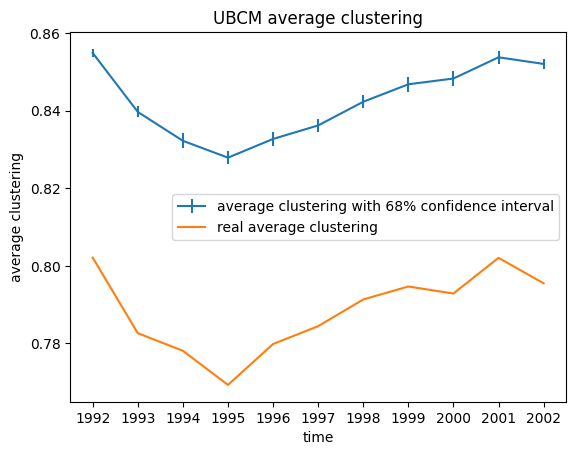

In [44]:
plot_avg_clustering(ubcm_avg_cluster, ubcm_std, "UBCM")

+ Directed

In [12]:
#numpy adjacency matrix
di_adj_wtw = {}
for name, graph in graphs.items():
    di_adj = nx.to_numpy_array(graph)
    di_adj_wtw[name] = di_adj

In [13]:
#NEMtropy DirectedGraph object
directed = {}
for name, adj in di_adj_wtw.items():
    graph = DirectedGraph(adj)
    directed[name] = graph

In [14]:
di_cluster = {}
di_reciprocity = {}
for name, graph in directed.items():
    graph.solve_tool(model="dcm_exp", max_steps=10000)
    graph.ensemble_sampler(30, cpu_n=1, output_dir=f"directed_sample_{name}/")
    di_clust = []
    di_reci = []
    for i in range(30):
        edgelist_ens = np.loadtxt(f"directed_sample_{name}/{i}.txt")
        ens_adj = build_adjacency_from_edgelist(edgelist = edgelist_ens,
                                                is_directed = True,
                                                is_sparse = False,
                                                is_weighted = False)
        G = nx.from_numpy_array(ens_adj,create_using=nx.DiGraph)
        di_clust.append(nx.average_clustering(G))
        di_reci.append(nx.reciprocity(G))
    di_cluster[name] = di_clust
    di_reciprocity[name] = di_reci


solution error = 2.7716211548067804e-09

solution error = 3.874333742714953e-09

solution error = 3.407006232691856e-09

solution error = 2.9464075623764074e-09

solution error = 2.3903332646568742e-09

solution error = 4.5587036368033296e-09

solution error = 2.8871625090687303e-09

solution error = 2.2946657907141343e-09

solution error = 2.0171029291304876e-09

solution error = 7.971749482749146e-09

solution error = 4.489848492994497e-09


In [15]:
dbcm_avg_cluster = {}
dbcm_std = {}
dbcm_avg_reciprocity = {}
dbcm_reci_std = {}
for name, clust in di_cluster.items():
    avg_cluster = np.average(clust)
    std = np.std(clust)
    dbcm_avg_cluster[name] = avg_cluster
    dbcm_std[name] = std
for name, reci in di_reciprocity.items():
    avg_reci = np.average(reci)
    std = np.std(reci)
    dbcm_avg_reciprocity[name] = avg_reci
    dbcm_reci_std[name] = std

In [41]:
def plot_avg_reciprocity(reci_dict, reci_std_dict, method):
    N = sorted(reci_dict.keys())
    c = [reci_dict[i] for i in N]
    errorbar = [reci_std_dict[i] for i in N]
    plt.errorbar(N, c, yerr = errorbar,label="average reciprocity with 68% confidence interval")
    plt.errorbar(sorted(reciprocity.keys()),[reciprocity[i] for i in sorted(reciprocity.keys())],label = "real reciprocity")
    plt.xlabel('time')
    plt.ylabel('reciprocity coefficient')
    plt.legend(loc='best')
    plt.title("{} reciprocity coefficient".format(method))
    plt.show()

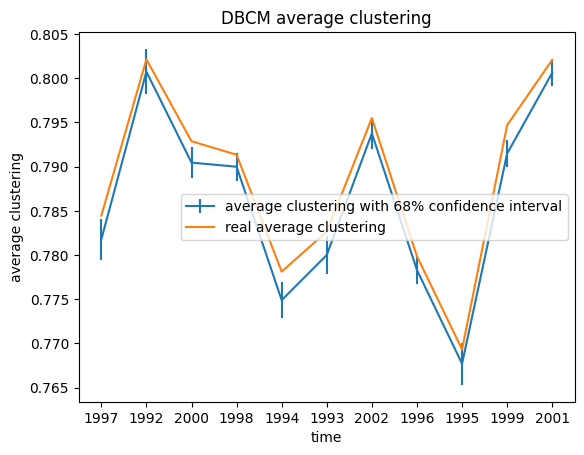

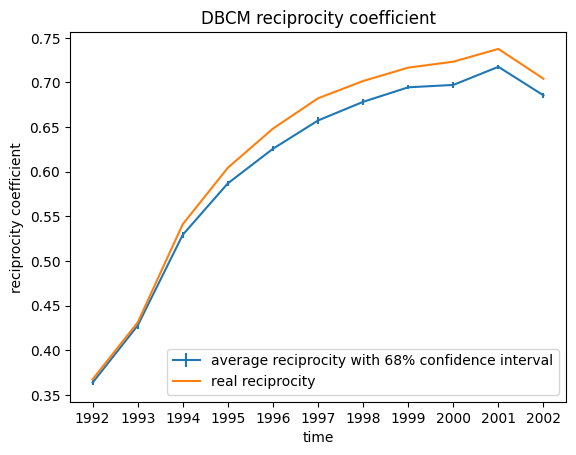

In [42]:
plot_avg_clustering(dbcm_avg_cluster, dbcm_std, "DBCM")
plot_avg_reciprocity(dbcm_avg_reciprocity, dbcm_reci_std, "DBCM")

## A06.2 - Weighted ERGMs

Task: Repeat the analysis of point 1 with weighted networks

+ measure strength assortativity coefficient on the data
+ fit the Undirected Enhanced CM and Directed Enhanced CM using the CReMa method
+ sample 30 networks from the obtained distributions and measure strength assortativity. Calculate average and std dev
+ plot strength assortativity as a function of time, comparing the real value with the average and error bars from samples
+ DECM: plot all pairs of assortativity (in-in, in-out, out-out)

## A06.3 - Drawing conclusions

Task: write a short paragraph to draw conclusions about the structure of the World Trade Web based on the ERGM inferential approach

You should include at least the following points:
+ Comment on the interpretation of the clustering and reciprocity coefficients found in the original data
+ Comment on the interpretation of strength assortativity for this dataset
+ Comment on the conclusions you can draw via the inference of the UBCM, DBCM and DECM models